#### problem and solutions:
    Nowadays, people have the option to call the doctor's office and while making an appointment also get to know about the fee, but if you are in travel and need to consult an random on-road doctor, then it becomes impossible to predict the fee of that particular doctor. The only option remains is to go for diagnosis and get surprised by the amount for diagnosis.
    
    The solution can be to be predict the fees of a particular doctor by analysing their qualifications,experience,place of operation and trying to draw conclusion about the fee.

#### Objective:
    Our objective is to build a model which will consider various features of a professional doctor like qualifications, experience and more and will predict the consultation fee in order to avoid any hassles during emergencies.
    
    
#### Problem framing:
    Our target feature is 'Fees' which is an numerical feature with discrete values, but the doctor's fee is an amount so the actual fee can be a continuous numerical variable. Also we have target feature data available to us. So this is Supervised Regression type.
    
#### Performance measurement metrics:
    We will measure performance of our model with metrics 'mean squared error' and 'mean absolute error'. Mean squared error measures the average squared difference between the estimated values and the actual values, while mean absolute error is the absolute average of errors between the estimated values and the actual values.
    
#### Dataset size:
    Training data : 5961 records
    Testing data : 1987 records

#### FEATURES:

#### Qualification: 
    Qualification and degrees held by the doctor
    Nominal feature.
                    

#### Experience: 
    Experience of the doctor in number of years
    Values: integers from 0 to 66

#### Rating: 
    Rating given by patients
    Values: in percentages

#### Profile: 
    Type of the doctor
    Values:
        Dentist             
        General Medicine    
        Dermatologists      
        Homeopath           
        Ayurveda            
        ENT Specialist 
        

#### Miscellaneous_Info:
    Extra information about the doctor
    Nominal feature.

#### Fees: 
    Fees charged by the doctor (Target Variable)
    Numerical feature.

#### Place:
    Area and the city where the doctor is located.
    Nominal feature.

### Loading the required libraries

In [131]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn

# for label encoding
from sklearn.preprocessing import LabelEncoder

# for standard scaling the distribution of data inthe features
from sklearn.preprocessing import StandardScaler

# for linear regression
from sklearn.linear_model import LinearRegression

# for metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_rows',None)

### Loading the training datset

In [3]:
df_train=pd.read_excel("C:/Users/ashis/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Train.xlsx")

In [4]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


### Loading the testing dataset

In [5]:
df_test=pd.read_excel("C:/Users/ashis/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx")

In [6]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


### load the sample test output

In [7]:
df_out=pd.read_excel("C:/Users/ashis/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Sample_submission.xlsx")

In [8]:
df_out.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


## Step-1 Descriptive analysis

First lets create a copy of the training dataset for analysis purpose.

In [9]:
df_train_cp=pd.DataFrame(data=df_train)
df_train_cp.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


Similarly create copy of the testing dataset for analysis purpose

In [10]:
df_test_cp=pd.DataFrame(data=df_test)
df_test_cp.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Similarly we will create a copy of testing output sample dataset

In [11]:
df_out_cp=pd.DataFrame(data=df_out)
df_out_cp.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


In [12]:
df_train_cp.shape

(5961, 7)

In [13]:
df_test_cp.shape

(1987, 6)

In [14]:
df_out_cp.shape

(1987, 1)

Our <b>training</b> dataset has <b>5961</b> records of data which are divided among <b>6 independent features</b> data and <b>a target feature</b> data. On the other hand , the <b>testing</b> dataset has <b>1987</b> records of <b>6 independent features</b>.

In [15]:
df_train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [16]:
df_test_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [17]:
df_out_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Fees    1987 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


Our **training** dataset has **5961 rows of records** but some independent features,**'Rating'** and **'Miscellaneous_Info'**, have some records missing as can be seen from the Non-Null Count above. All **5 independent features are of 'object' datatype** and the **target feature 'Fees'** has values which are **int64**.

Our **testing** dataset has **1987 rows of records** but here also **Rating** and **Miscellaneous_Info** feature has missing values.

In [18]:
# check for duplicate records in training dataset
dup_df=df_train_cp[df_train_cp.duplicated()]
dup_df.shape

(40, 7)

In [19]:
# check for duplicate records in testing dataset
dup_df=df_test_cp[df_test_cp.duplicated()]
dup_df.shape

(11, 6)

In [20]:
# check for duplicate records in sample output dataset
dup_df=df_out_cp[df_out_cp.duplicated()]
dup_df.shape

(937, 1)

In [21]:
# dropping duplicates
df_train_cp.drop_duplicates(inplace=True,ignore_index=True)

In [22]:
df_train_cp.shape

(5921, 7)

In [23]:
df_test_cp.shape

(1987, 6)

After **removing the duplicate** records our **training** dataset has **5921 records instead of 5961 records**.

In [24]:
# check for missing values in training dataset
round(df_train_cp.isnull().sum()/df_train_cp.shape[0]*100,2).astype(str)+"%"

Qualification           0.0%
Experience              0.0%
Rating                55.09%
Place                  0.03%
Profile                 0.0%
Miscellaneous_Info    43.59%
Fees                    0.0%
dtype: object

In [25]:
#check for missing values in the form of ' ?' in training dataset
round(df_train_cp.isin([' ?']).sum()/df_train_cp.shape[0]*100,2).astype(str)+"%"

Qualification         0.0%
Experience            0.0%
Rating                0.0%
Place                 0.0%
Profile               0.0%
Miscellaneous_Info    0.0%
Fees                  0.0%
dtype: object

In [26]:
# check for missing values in test
round(df_test_cp.isnull().sum()/df_test_cp.shape[0]*100,2).astype(str)+"%"

Qualification           0.0%
Experience              0.0%
Rating                54.86%
Place                   0.3%
Profile                 0.0%
Miscellaneous_Info    41.97%
dtype: object

In [27]:
#check for missing values in the form of ' ?'
round(df_test_cp.isin([' ?']).sum()/df_test_cp.shape[0]*100,2).astype(str)+"%"

Qualification         0.0%
Experience            0.0%
Rating                0.0%
Place                 0.0%
Profile               0.0%
Miscellaneous_Info    0.0%
dtype: object

In [28]:
# check for missing values in test
round(df_out_cp.isnull().sum()/df_out_cp.shape[0]*100,2).astype(str)+"%"

Fees    0.0%
dtype: object

In [29]:
#check for missing values in the form of ' ?'
round(df_out_cp.isin([' ?']).sum()/df_out_cp.shape[0]*100,2).astype(str)+"%"

Fees    0.0%
dtype: object

In our **training** dataset, we have null/missing values in **'Rating'** feature and **'Miscellaneous_Info'**. Independent feature **'Place'** has very less null values. While the **testing** dataset also has missing values in **Rating** and **Miscellaneous_Info** feature. We will handle these missing values during data pre-processing.

In [30]:
# statistical summary of numerial features
df_train_cp.describe()

,Fees
count,5921.000000
mean,309.121432
std,190.833707
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [31]:
# statistical summary of numerial features
df_out_cp.describe()

,Fees
count,1987.000000
mean,1952.094112
std,351.198610
min,1116.000000
25%,1681.500000
50%,1948.000000
75%,2207.000000
max,3031.000000


We have **only one numerical feature**, that too, target feature **'Fees'**. We observe that the **standard deviation is very high** meaning that the data distribution is away from the mean.

## Step-2 Exploratory Data Analysis

#### Univariate analysis of features

#### 1. 'Qualification' 

In [32]:
# seperate the various qualifications of a doctor from training dataset
qual_1=[]
qual_1.clear()
qual_2=[]
qual_2.clear()
qual_3=[]
qual_3.clear()
for i in df_train_cp['Qualification']:
    qual_1.append(i.split(",")[0])
    if len(i.split(","))==2:
        qual_2.append(i.split(",")[1])
    else:
        qual_2.append("NA")
    if len(i.split(","))==3:
        qual_3.append(i.split(",")[2])
    else:
        qual_3.append("NA")

In [33]:
# seperate the various qualifications of a doctor from testing dataset
qual_4=[]
qual_4.clear()
qual_5=[]
qual_5.clear()
qual_6=[]
qual_6.clear()
for i in df_test_cp['Qualification']:
    qual_4.append(i.split(",")[0])
    if len(i.split(","))==2:
        qual_5.append(i.split(",")[1])
    else:
        qual_5.append("NA")
    if len(i.split(","))==3:
        qual_6.append(i.split(",")[2])
    else:
        qual_6.append("NA")

In [34]:
df_train_cp['1st qualification']=qual_1
df_train_cp['2nd qualification']=qual_2
df_train_cp['3rd qualification']=qual_3

In [35]:
df_test_cp['1st qualification']=qual_4
df_test_cp['2nd qualification']=qual_5
df_test_cp['3rd qualification']=qual_6

For both training and testing dataset, we will keep the extracted data from 'Qualification' feature into seperate columns and drop the 'Qualification' feature.

In [36]:
df_train_cp.drop('Qualification',axis=1,inplace=True)

In [37]:
df_test_cp.drop('Qualification',axis=1,inplace=True)

As there are many values in '1st qualification' which are not recorded for any other doctor, so we will take multiple times repititive degrees of doctors to find any trends.

In [38]:
qual_4

['MBBS',
 'MBBS',
 'MBBS',
 'BAMS',
 'BDS',
 'BDS',
 'MBBS',
 'BDS',
 'MD - Ayurveda Medicine',
 'BHMS',
 'BDS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MS - ENT',
 'BDS',
 'MBBS',
 'MBBS',
 'BDS',
 'MBBS',
 'BHMS',
 'BDS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'BDS',
 'MBBS',
 'MS - ENT',
 'BDS',
 'BAMS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'BHMS',
 'BSc',
 'BHMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'MBBS',
 'BHMS',
 'BHMS',
 'MBBS',
 'MBBS',
 'Fellowship in Aesthetic Medicine',
 'BHMS',
 'BDS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MDS - Conservative Dentistry & Endodontics',
 'BDS',
 'BHMS',
 'MBBS',
 'BAMS',
 'MBBS',
 'BHMS',
 'MBBS',
 'BAMS',
 'BHMS',
 'BAMS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'LCEH',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'DM - Nephrology',
 'BAMS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'BHMS',
 'BDS',
 'MBBS',
 'MBBS',
 'BAMS',
 'Post Graduate Diploma in Diabetology (PGDD)(Madras Medical College)',
 'Certificate in Dental Implants',
 'MBBS

In [39]:
top_qualifications=df_train_cp['1st qualification'].value_counts()[:10]

In [40]:
top_qualifications.keys()

Index(['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology ', 'MS - ENT',
       'MD - Dermatology', 'MD - Homeopathy', 'MD - Ayurveda Medicine',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype='object')

#### 2.Experience

We will extract the experience in years from the 'Experience' feature and store it in a list for analysis.

In [41]:
df_test_cp.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,1st qualification,2nd qualification,3rd qualification
0,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,MBBS,NA,NA
1,31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,MBBS,Diploma in Otorhinolaryngology (DLO),NA
2,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",MBBS,DDVL,NA
3,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,BAMS,NA,NA
4,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,BDS,MDS - Conservative Dentistry & Endodontics,NA


In [42]:
Exp=[]
for i in df_train_cp['Experience']:
    Exp.append(int(i.split(" ")[0]))

In [43]:
Exp_1=[]
for i in df_test_cp['Experience']:
    Exp_1.append(int(i.split(" ")[0]))

For both training and testing dataset, we will drop the existing 'Experience' column as we have extracted the important numerical part from it and we will use it further.

In [44]:
top_q=df_train_cp.groupby(['MBBS','BDS','BAMS','BHMS','MD - Dermatology','MS - ENT','MD - Dermatology','MD - Homeopathy','MD - Ayurveda Medicine'],axis=1)

In [45]:
top_q.groups

{'BAMS': ['Place'], 'BDS': ['Rating'], 'BHMS': ['Profile'], 'MBBS': ['Experience'], 'MD - Ayurveda Medicine': ['3rd qualification'], 'MD - Dermatology': ['Miscellaneous_Info', '1st qualification'], 'MD - Homeopathy': ['2nd qualification'], 'MS - ENT': ['Fees']}

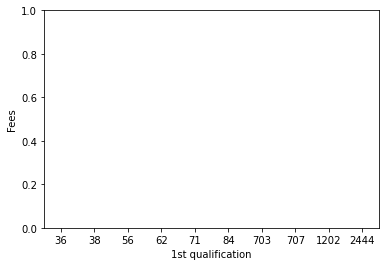

In [46]:
sn.boxplot(x=top_qualifications,y=df_train_cp['Fees'])
plt.show()

In [47]:
df_train_cp['Experience in years']=Exp
df_test_cp['Experience in years']=Exp_1

In [48]:
df_train_cp.drop('Experience',axis=1,inplace=True)
df_test_cp.drop('Experience',axis=1,inplace=True)

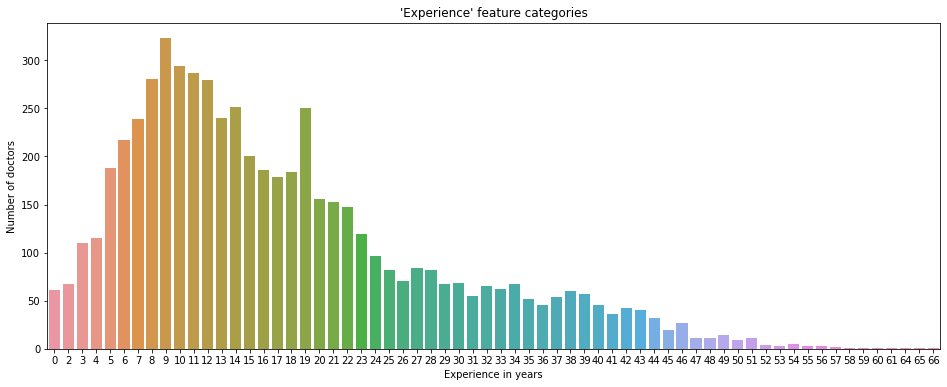

In [49]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)
ax=sn.countplot(df_train_cp['Experience in years'])
plt.title("'Experience' feature categories")
plt.xlabel('Experience in years')
plt.ylabel('Number of doctors')
plt.show()

Most of the doctors have average work experience of 8-13 years, Very few doctors have been practising for more than 50 years.

#### 3.'Rating'

For better analysis of "Rating" feature, we will seperate the '%' from the numbers.

As doctor's ratings are numeric data, so we will replace the missing values in the 'Rating' feature with mean value.
First,we will fill the null values with any '0%' and then replace them with mean of the ratings because we do not have any 0% ratings , so it will be easy to replace.

In [50]:
df_train_cp.head()

,Rating,Place,Profile,Miscellaneous_Info,Fees,1st qualification,2nd qualification,3rd qualification,Experience in years
0,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NA,24
1,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NA,12
2,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NA,9
3,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NA,12
4,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NA,NA,20


In [51]:
df_train_cp['Rating'].fillna("0%",inplace=True)
df_test_cp['Rating'].fillna("0%",inplace=True)

In [52]:
df_train_cp['Rating'].dtypes

dtype('O')

In [53]:
# seperate numerical feature from '%' symbol for both training and testing data

rating=[]
for i in df_train_cp['Rating']:
    rating.append(int(i.split("%")[0]))
    
rating_1=[]
for i in df_test_cp['Rating']:
    rating_1.append(int(i.split("%")[0]))

In [54]:
# create into series object to apply median functionality
rating_tr=pd.Series(data=rating,dtype='int64')
rating_tst=pd.Series(data=rating_1,dtype='int64')

In [55]:
rating_tr.median()

0.0

In [56]:
df_test_cp['Rating'].value_counts()

0%      1090
100%     223
98%      112
97%       84
99%       68
96%       65
94%       51
95%       47
93%       34
92%       29
90%       29
91%       26
88%       13
87%       11
83%       11
89%       11
82%        9
85%        8
71%        7
84%        7
80%        7
86%        6
73%        5
67%        5
60%        4
70%        4
76%        4
81%        3
55%        3
64%        2
79%        2
69%        2
52%        1
77%        1
78%        1
53%        1
65%        1
Name: Rating, dtype: int64

In [57]:
rating_tst.median()

0.0

In [58]:
# replace 0 with rating_s mean value
rating_tr.replace({0:int(rating_tr.median())},inplace=True)
rating_tst.replace({0:int(rating_tst.median())},inplace=True)

For both training and testing dataset, remove the existing 'Rating' feature and replace it with our feature extracted columns which contains ratings in numerical format.

In [59]:
df_train_cp['Rating (%)']=rating_tr
df_test_cp['Rating (%)']=rating_tst

In [60]:
df_train_cp.drop('Rating',axis=1,inplace=True)
df_test_cp.drop('Rating',axis=1,inplace=True)

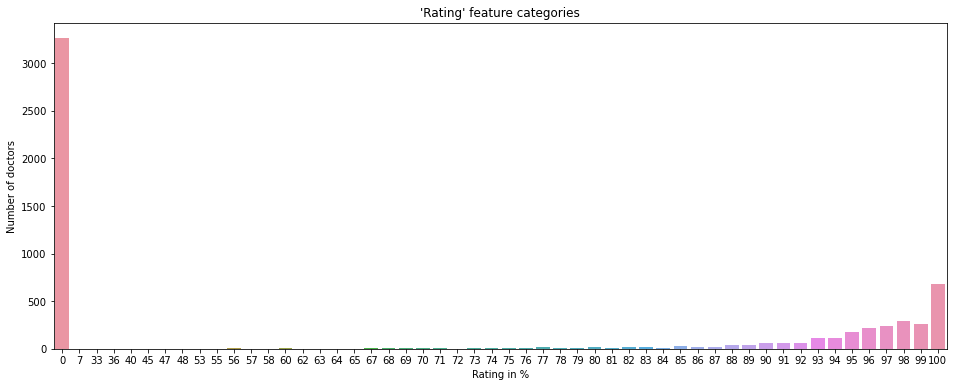

In [61]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)
ax=sn.countplot(df_train_cp['Rating (%)'])
plt.title("'Rating' feature categories")
plt.xlabel('Rating in %')
plt.ylabel('Number of doctors')
plt.show()

In above figure,we can ignore the 0% rating as it was used in place of missing values and to remove errors while plotting for other ratings.
We see that most of the doctors from training dataset have more than 90% ratings.

#### 4. 'Place'

In [62]:
df_train_cp['Place'].value_counts()

HSR Layout, Bangalore                     75
Andheri West, Mumbai                      70
Dwarka, Delhi                             67
Banjara Hills, Hyderabad                  63
Mulund West, Mumbai                       54
Borivali West, Mumbai                     52
Kandivali West, Mumbai                    50
Indiranagar, Bangalore                    48
Malad West, Mumbai                        47
Whitefield, Bangalore                     47
Malleswaram, Bangalore                    46
Pitampura, Delhi                          45
Vileparle West, Mumbai                    43
Andheri East, Mumbai                      43
Powai, Mumbai                             42
Jubilee Hills, Hyderabad                  40
Marathahalli, Bangalore                   39
Bannerghatta Road, Bangalore              39
Ghatkopar East, Mumbai                    38
Kondapur, Hyderabad                       38
Bandra West, Mumbai                       38
Rohini, Delhi                             37
Secunderab

For both training and testing dataset, We will seperate the locality from the city.

In [63]:
df_train_cp.head()

,Place,Profile,Miscellaneous_Info,Fees,1st qualification,2nd qualification,3rd qualification,Experience in years,Rating (%)
0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NA,24,100
1,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NA,12,98
2,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NA,9,0
3,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NA,12,0
4,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NA,NA,20,100


In [64]:
df_test_cp.head()

,Place,Profile,Miscellaneous_Info,1st qualification,2nd qualification,3rd qualification,Experience in years,Rating (%)
0,"Ghatkopar East, Mumbai",General Medicine,NaN,MBBS,NA,NA,35,0
1,"West Marredpally, Hyderabad",ENT Specialist,NaN,MBBS,Diploma in Otorhinolaryngology (DLO),NA,31,0
2,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",MBBS,DDVL,NA,40,70
3,"New Ashok Nagar, Delhi",Ayurveda,NaN,BAMS,NA,NA,0,0
4,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,BDS,MDS - Conservative Dentistry & Endodontics,NA,16,100


In [66]:
df_train_cp['Place'].isnull().sum()

2

In [67]:
df_test_cp['Place'].isnull().sum()

6

We will replace the missing values with most frequent value which is 'HSR Layout, Bangalore'

In [68]:
df_train_cp['Place'].fillna('HSR Layout, Bangalore',inplace=True)
df_test_cp['Place'].fillna('HSR Layout, Bangalore',inplace=True)

In [69]:
cities=[]
localities=[]
for i in df_train_cp['Place']:
    cities.append(i.split(",")[-1])
    localities.append(i.split(",")[0])
    
cities_1=[]
localities_1=[]
for i in df_test_cp['Place']:
    cities_1.append(i.split(",")[-1])
    localities_1.append(i.split(",")[0])

In [70]:
df_train_cp['City']=cities
df_train_cp['Locality']=localities

df_test_cp['City']=cities_1
df_test_cp['Locality']=localities_1

In [71]:
df_train_cp.drop('Place',axis=1,inplace=True)
df_test_cp.drop('Place',axis=1,inplace=True)

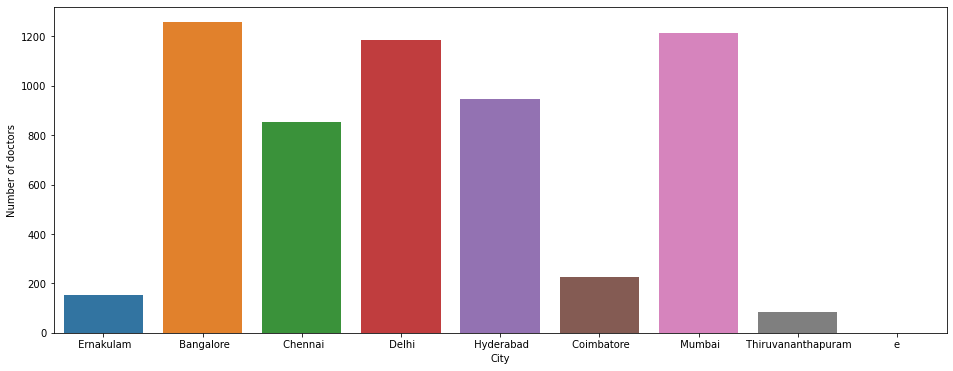

In [72]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)
ax=sn.countplot(df_train_cp['City'])
plt.title("")
plt.xlabel('City')
plt.ylabel('Number of doctors')
plt.show()

Currently, our training dataset mostly has doctors from Bangalore, Delhi and Mumbai. For our analysis, we have very few doctor's data from Ernakulam, Coimbatore and Thiruvananthpuram.

#### 5. Profile

In [73]:
df_train_cp['Profile'].value_counts()

Dentist             1391
General Medicine    1169
Dermatologists      1011
Homeopath            840
Ayurveda             782
ENT Specialist       728
Name: Profile, dtype: int64

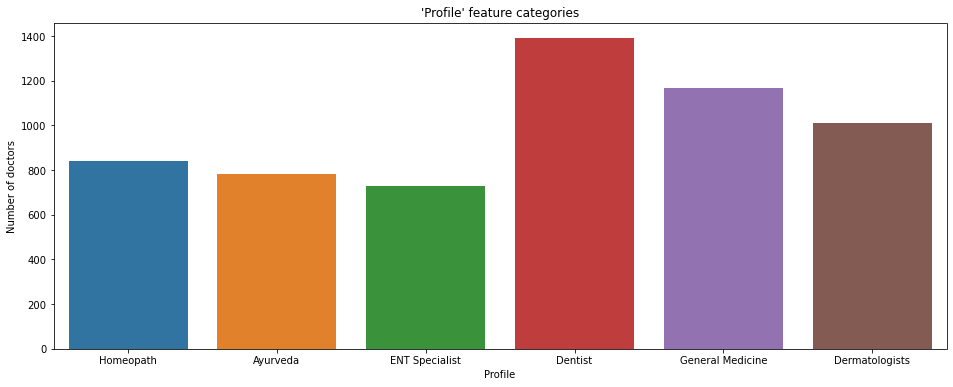

In [74]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)
ax=sn.countplot(df_train_cp['Profile'])
plt.title("'Profile' feature categories")
plt.xlabel('Profile')
plt.ylabel('Number of doctors')
plt.show()

Most of the doctors surveyed have been Dentist and General Medicine practising doctors.

#### 6. Miscellaneous_Info

In [75]:
df_train_cp.head()

,Profile,Miscellaneous_Info,Fees,1st qualification,2nd qualification,3rd qualification,Experience in years,Rating (%),City,Locality
0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NA,24,100,Ernakulam,Kakkanad
1,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NA,12,98,Bangalore,Whitefield
2,ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NA,9,0,Bangalore,Mathikere - BEL
3,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NA,12,0,Bangalore,Bannerghatta Road
4,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NA,NA,20,100,Chennai,Keelkattalai


In [76]:
df_test_cp.head()

,Profile,Miscellaneous_Info,1st qualification,2nd qualification,3rd qualification,Experience in years,Rating (%),City,Locality
0,General Medicine,NaN,MBBS,NA,NA,35,0,Mumbai,Ghatkopar East
1,ENT Specialist,NaN,MBBS,Diploma in Otorhinolaryngology (DLO),NA,31,0,Hyderabad,West Marredpally
2,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",MBBS,DDVL,NA,40,70,Chennai,KK Nagar
3,Ayurveda,NaN,BAMS,NA,NA,0,0,Delhi,New Ashok Nagar
4,Dentist,General Dentistry Conservative Dentistry Cosme...,BDS,MDS - Conservative Dentistry & Endodontics,NA,16,100,Bangalore,Kanakpura Road


In [77]:
df_train_cp['Miscellaneous_Info'].value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                                                                               40
Dental Fillings Zirconia Crowns Dental Implant Fixing                                                                                            12
Tooth Extraction Dental Fillings Scaling / Polishing                                                                                             12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment                                                              9
Skin Allergy Treatment Skin Allergies Dermabrasion                                                                                                9
Cosmetic/ Aesthetic Dentistry Crowns and Bridges Fixing Complete/Partial Dentures Fixing                                                          8
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                                                         

We donot see any pattern or repititive values in Miscellaneous Info feature.

#### 7. 'Fees'

In [83]:
df_train_cp['Fees'].value_counts()

100    1274
500     937
200     902
300     863
400     424
250     307
150     251
600     214
700     153
800     143
350     143
50       80
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

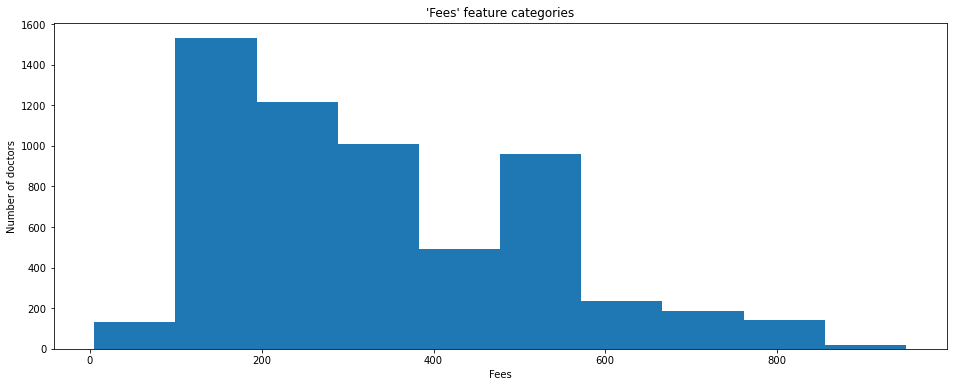

In [84]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)
ax.hist(df_train_cp['Fees'])
plt.title("'Fees' feature categories")
plt.xlabel('Fees')
plt.ylabel('Number of doctors')
plt.show()

From our training dataset, we observe that most of the doctors are charging around 150-200 as consultation fee.

In [85]:
df_train_cp.columns

Index(['Profile', 'Miscellaneous_Info', 'Fees', '1st qualification',
       '2nd qualification', '3rd qualification', 'Experience in years',
       'Rating (%)', 'City', 'Locality'],
      dtype='object')

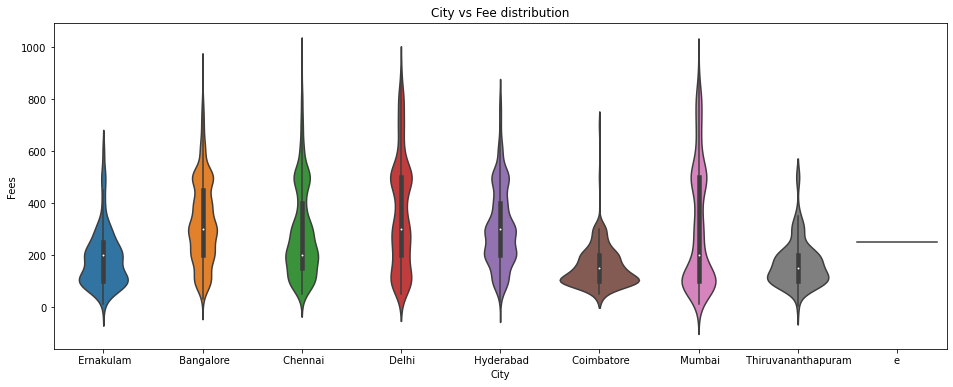

In [86]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)
ax=sn.violinplot(x=df_train_cp['City'],y=df_train_cp['Fees'])
plt.title("City vs Fee distribution")
plt.xlabel('City')
plt.ylabel('Fees')
plt.show()

From above figure, we observe that:

    In Ernakulam, most of the doctors are charging Rs.200
    
    In Bangalore, the density of doctors's fee is constant throughout the range of fee between Rs.100 - Rs.500.
    
    In Chennai, most of the doctors charge around Rs.200 but there is significant density of doctors who charge more than Rs.500
    
    In Delhi, the density of doctors is constant like Banglore.
    
    In coimbatore, the charges are very less for all doctors and the same is seen for Thiruvananthapuram.
    

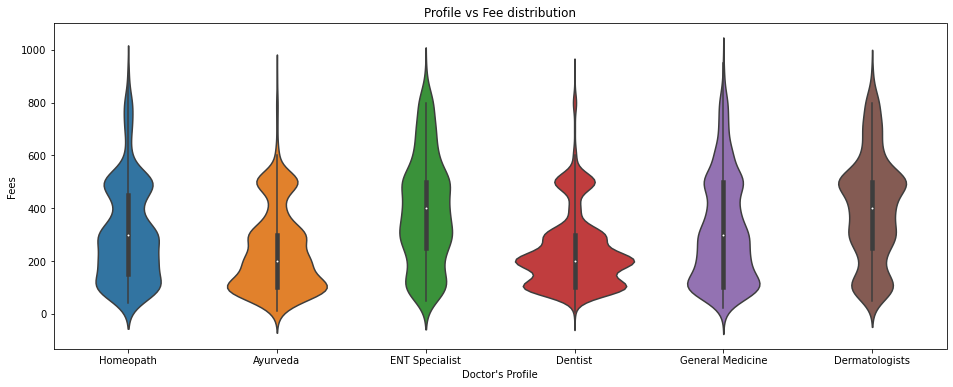

In [87]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)
ax=sn.violinplot(x=df_train_cp['Profile'],y=df_train_cp['Fees'])
plt.title("Profile vs Fee distribution")
plt.xlabel("Doctor's Profile")
plt.ylabel('Fees')
plt.show()

## Step- Data Preprocessing

In [88]:
df_train_cp.head()

,Profile,Miscellaneous_Info,Fees,1st qualification,2nd qualification,3rd qualification,Experience in years,Rating (%),City,Locality
0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NA,24,100,Ernakulam,Kakkanad
1,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NA,12,98,Bangalore,Whitefield
2,ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NA,9,0,Bangalore,Mathikere - BEL
3,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NA,12,0,Bangalore,Bannerghatta Road
4,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NA,NA,20,100,Chennai,Keelkattalai


#### Check for outliers

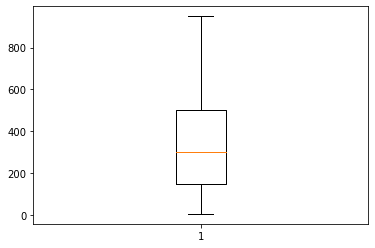

In [89]:
plt.boxplot(df_train_cp['Fees'])
plt.show()

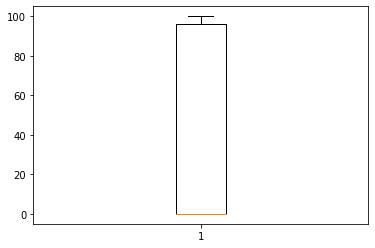

In [90]:
plt.boxplot(df_train_cp['Rating (%)'])
plt.show()

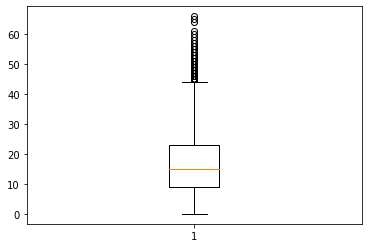

In [91]:
plt.boxplot(df_train_cp['Experience in years'])
plt.show()

From above boxplots, we observe that numerical features in our dataset do not have any outliers.

#### Feature selection:

In [92]:
df_train_cp.columns

Index(['Profile', 'Miscellaneous_Info', 'Fees', '1st qualification',
       '2nd qualification', '3rd qualification', 'Experience in years',
       'Rating (%)', 'City', 'Locality'],
      dtype='object')

We will create a copy of the dataset without 'Miscellaneous_Info' feature to compare performance of model with and without this feature.

In [93]:
df_train_cp_1=df_train_cp.drop('Miscellaneous_Info',axis=1)
df_test_cp_1=df_test_cp.drop('Miscellaneous_Info',axis=1)

#### Label Encoding of 'object' type features:

In [94]:
le=LabelEncoder()

In [95]:
# for training dataset with 'Miscellaneous_Info'
for col in df_train_cp.columns:
    if df_train_cp[col].dtypes=='object':
        df_train_cp[col]=le.fit_transform(df_train_cp[col])
        
# for training dataset without 'Miscellaneous_Info'
for col in df_train_cp_1.columns:
    if df_train_cp_1[col].dtypes=='object':
        df_train_cp_1[col]=le.fit_transform(df_train_cp_1[col])
        
# for testing dataset with 'Miscellaneous_Info'
for col in df_test_cp.columns:
    if df_test_cp[col].dtypes=='object':
        df_test_cp[col]=le.fit_transform(df_test_cp[col])
        
# for testing dataset without 'Miscellaneous_Info'
for col in df_test_cp_1.columns:
    if df_test_cp_1[col].dtypes=='object':
        df_test_cp_1[col]=le.fit_transform(df_test_cp_1[col])

#### Seperate the dataset into independent features and target feature.

In [99]:
# training data with 'Miscellaneous_Info' feature
x_tr=df_train_cp.drop('Fees',axis=1)
y_tr=df_train_cp['Fees']

# training data without 'Miscellaneous_Info' feature
x_tr_1=df_train_cp_1.drop('Fees',axis=1)
y_tr_1=df_train_cp_1['Fees']

# testing data with 'Miscellaneous_Info' feature
x_tst=pd.DataFrame(data=df_test_cp,columns=df_test_cp.columns)

# testing data without 'Miscellaneous_Info' feature
x_tst_1=pd.DataFrame(data=df_test_cp_1,columns=df_test_cp_1.columns)

# testing output
y_tst=pd.DataFrame(data=df_out_cp,columns=df_out_cp.columns)

#### Feature scaling

In [110]:
# for training dataset with 'Miscellaneous_Info' feature
for col in x_tr.columns:
    x_tr[col]=s.fit_transform(x_tr[col].values.reshape(-1,1))

# for training dataset without 'Miscellaneous_Info' feature
for col in x_tr_1.columns:
    x_tr_1[col]=s.fit_transform(x_tr_1[col].values.reshape(-1,1))
    
# for testing dataset with 'Miscellaneous_Info' feature
for col in x_tst.columns:
    x_tst[col]=s.fit_transform(x_tst[col].values.reshape(-1,1))

# for testing dataset without 'Miscellaneous_Info' feature
for col in x_tst_1.columns:
    x_tst_1[col]=s.fit_transform(x_tst_1[col].values.reshape(-1,1))

## Step - Data Modelling

In [113]:
print(x_tr.shape)
print(y_tr.shape)
print(x_tr_1.shape)
print(y_tr_1.shape)
print(x_tst.shape)
print(x_tst_1.shape)
print(y_tst.shape)

(5921, 9)
(5921, 1)
(5921, 8)
(5921,)
(1987, 9)
(1987, 8)
(1987, 1)


In [114]:
# for with 'Miscellaneous_Info' feature
lr=LinearRegression()

# for without 'Miscellaneous_Inzfo' feature
lr_1=LinearRegression()

# with 'Miscellaneous_Info' feature
lr.fit(x_tr,y_tr)

# without 'Miscellaneous_Info' feature
lr_1.fit(x_tr_1,y_tr_1)

LinearRegression()

In [115]:
pred_lr=lr.predict(x_tst)

pred_lr_1=lr_1.predict(x_tst_1)

In [117]:
print("Errors:\n")
print("Mean Squared Error: (with 'Miscellaneous_Info' feature) \t",mean_squared_error(y_tst,pred_lr))
print("\nMean Absolute Error: (with 'Miscellaneous_Info' feature) \t",mean_absolute_error(y_tst,pred_lr))
print("\nRoot Mean Squared Error: (with 'Miscellaneous_Info' feature)\t",np.sqrt(mean_squared_error(y_tst,pred_lr)))

Errors:

Mean Squared Error: (with 'Miscellaneous_Info' feature) 	 2827558.5264330697

Mean Absolute Error: (with 'Miscellaneous_Info' feature) 	 1642.9726795357121

Root Mean Squared Error: (with 'Miscellaneous_Info' feature)	 1681.5345748550844


In [119]:
print("Errors:\n")
print("Mean Squared Error: (without 'Miscellaneous_Info' feature) \t",mean_squared_error(y_tst,pred_lr_1))
print("\nMean Absolute Error: (without 'Miscellaneous_Info' feature) \t",mean_absolute_error(y_tst,pred_lr_1))
print("\nRoot Mean Squared Error: (without 'Miscellaneous_Info' feature)\t",np.sqrt(mean_squared_error(y_tst,pred_lr_1)))

Errors:

Mean Squared Error: (without 'Miscellaneous_Info' feature) 	 2827482.9503572723

Mean Absolute Error: (without 'Miscellaneous_Info' feature) 	 1642.9726795357121

Root Mean Squared Error: (without 'Miscellaneous_Info' feature)	 1681.512102352306


In [123]:
lr.score(x_tr,y_tr)*100

9.762220817094814

In [124]:
lr_1.score(x_tr_1,y_tr_1)*100

9.607393619780524

We see that with linear regressor our model is not learning well as expected, so we will try other regressor models.

##### cross validation for linear regression

In [134]:
#(with "Miscellaneous_Info" feature)
score_cv = cross_val_score(lr, x_tr, y_tr, cv=10)
print('\n (with "Miscellaneous_Info" feature) The absolute mean score we got from 10-Fold CV:',np.mean(score_cv))


 (with "Miscellaneous_Info" feature) The absolute mean score we got from 10-Fold CV: 0.09265629149808867


In [135]:
#(without "Miscellaneous_Info" feature)
score_cv_1 = cross_val_score(lr_1, x_tr_1, y_tr_1, cv=10)
print('\n (without "Miscellaneous_Info" feature) The absolute mean score we got from 10-Fold CV:',np.mean(score_cv_1))


 (without "Miscellaneous_Info" feature) The absolute mean score we got from 10-Fold CV: 0.09203228701215868


#### Decision Tree Regressor

In [129]:
dtr=DecisionTreeRegressor()

dtr_cv=cross_val_score(dtr,x_tr,y_tr,cv=10)

print('\n (with "Miscellaneous_Info" feature) The absolute mean score we got from 10-Fold CV:',np.mean(dtr_cv))


 (with "Miscellaneous_Info" feature)The absolute mean score we got from 10-Fold CV: -0.4728365618690537


In [137]:
dtr_1=DecisionTreeRegressor()

dtr_cv_1=cross_val_score(dtr_1,x_tr_1,y_tr_1,cv=10)

print('\n (without "Miscellaneous_Info" feature) The absolute mean score we got from 10-Fold CV:',np.mean(dtr_cv_1))


 (without "Miscellaneous_Info" feature) The absolute mean score we got from 10-Fold CV: -0.576043119105426


#### Random forest regressor

##### with "Miscellaneous_Info" feature

In [132]:
rfr_cross_val=[]
rfr_n_estimators=[]

for i in range(10,50):
    rfr=RandomForestRegressor(n_estimators=i)
    rfr_n_estimators.append(i)
    rfr_cross_val.append(cross_val_score(rfr,x_tr,y_tr,cv=10).mean())
    
rf_cv=pd.DataFrame({})
rf_cv["RF CV Score"]=rfr_cross_val
rf_cv['n estimator']=rfr_n_estimators

rf_cv.max()

RF CV Score     0.182949
n estimator    49.000000
dtype: float64

##### without "Miscellaneous_Info" feature

In [133]:
rfr_cross_val=[]
rfr_n_estimators=[]

for i in range(10,50):
    rfr=RandomForestRegressor(n_estimators=i)
    rfr_n_estimators.append(i)
    rfr_cross_val.append(cross_val_score(rfr,x_tr_1,y_tr_1,cv=10).mean())
    
rf_cv=pd.DataFrame({})
rf_cv["RF CV Score"]=rfr_cross_val
rf_cv['n estimator']=rfr_n_estimators

rf_cv.max()

RF CV Score     0.147222
n estimator    49.000000
dtype: float64

In [141]:
results1=[]
results1.append(score_cv)
results1.append(score_cv_1)
results1.append(dtr_cv)
results1.append(dtr_cv_1)
results1.append(rf_cv['RF CV Score'])

names1=[]
names1.append("Linear Regression")
names1.append("Linear Regression(without'MI)")
names1.append("Decision Tree Regressor")
names1.append("Decision Tree Regressor(without'MI)")
names1.append("Random Forest Regressor")

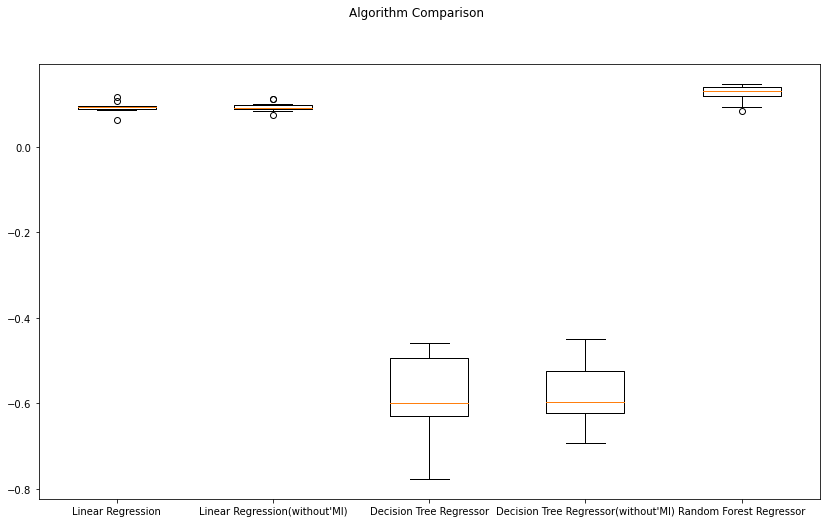

In [143]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

## After comparing the cross validation scores of various algorithms, we decided to use Random Forest Regressor.

## Step- Hyper parameter tuning

In [144]:
rf_cv.max()

RF CV Score     0.147222
n estimator    49.000000
dtype: float64

In [145]:
final_mod=RandomForestRegressor(n_estimators=49)

## Step- saving the model

In [146]:
import joblib
joblib.dump(final_mod,'doctor fee prediction.pkl')

['doctor fee prediction.pkl']